Consider a graph consisting of sites (vertices), in which each site $v$ is assigned a spin of $+1$ or $-1 .$ 
A configuration $\sigma$ is an assignment of spins to each site. That is, 
$\sigma_{v}=\pm 1,$ for all $v .$ 
We will assume a square $n \times n$ grid of sites, where each site is connected to four neighbors 
(up, down, left, and right), except at the boundary. Thus,
there are $n^{2}$ sites and $2^{n^{2}}$ possible configurations.

Here, we use Gibbs sampler method to simulate a 2D Ising model with $\beta=0,0.441,0.75,-1.5$

**Analytical solutions can be found in the notes**

In [8]:
import numpy as np

# Size of the 2D space
N = 100
# Neighbor list
nbs = np.array([[1,0],[0,1],[-1,0],[0,-1]])
# Prepare starting random binary 2D-array
Mat2D = np.random.choice([1,-1], size= N**2, replace=True)
Mat2D = Mat2D.reshape((N,N))
# Step
S = 100000

In [13]:
def evolve(mat, beta, nstep):
    global N, nbs
    period = list(range(N))
    for i in range(nstep):
        a,b = np.random.choice(period, size=2, replace=True)
        tempx = a+nbs[:,0]
        tempx = [N-1 if x_==-1 else x_ for x_ in tempx]
        tempx = [0 if x_==N else x_ for x_ in tempx]
        tempy = b+nbs[:,1]
        tempy = [N-1 if y_==-1 else y_ for y_ in tempy]
        tempy = [0 if y_==N else y_ for y_ in tempy]
        nn = 0 # Degree of nearest neighbors
        for t0,t1 in zip(tempx, tempy):
            nn+=mat[t0,t1]
            
        p=1/(1+np.exp(-2*beta*nn))
        
        if np.random.rand()<p:
            mat[a,b] = 1
        else:
            mat[a,b] = -1
            
    return mat

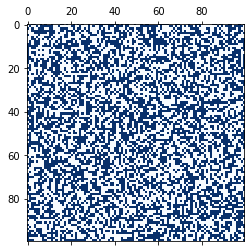

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

beta = 0
mat1 = evolve(Mat2D, beta, S)
fig, ax = plt.subplots()
ax.matshow(mat1, cmap=plt.cm.Blues)

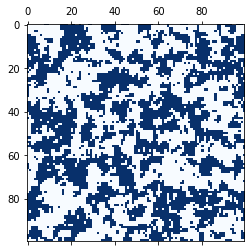

In [15]:
beta = 0.441
mat1 = evolve(Mat2D, beta, S)
fig, ax = plt.subplots()
ax.matshow(mat1, cmap=plt.cm.Blues)

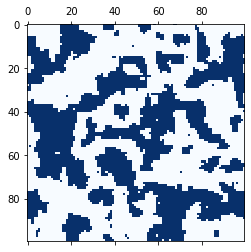

In [16]:
beta = 0.75
mat1 = evolve(Mat2D, beta, S)
fig, ax = plt.subplots()
ax.matshow(mat1, cmap=plt.cm.Blues)

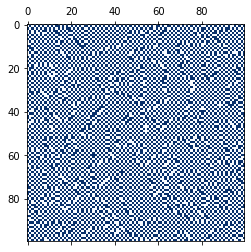

In [17]:
beta = -1.5
mat1 = evolve(Mat2D, beta, S)
fig, ax = plt.subplots()
ax.matshow(mat1, cmap=plt.cm.Blues)